<a href="https://colab.research.google.com/github/datasciencedecoded/Data-Science-Decoded-Notebooks/blob/main/Calibration_Curve_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

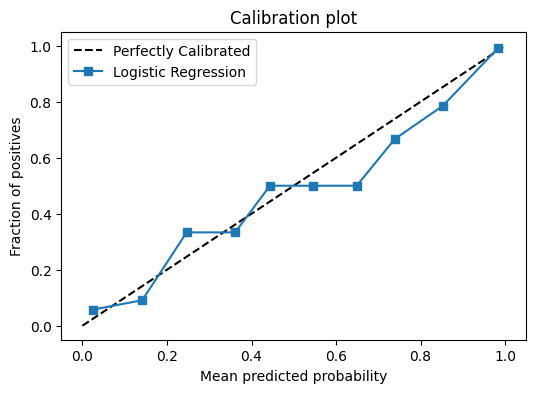

In [11]:
# Import libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=2, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10, strategy='uniform')

# Plot the calibration curve
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.plot(prob_pred, prob_true, "s-", label="Logistic Regression")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title('Calibration plot')
plt.legend()
plt.show()